# Salt dome

This workflow can be extended to any geometry.

Content:
* [Create, refine and assign topology to geometry](#geometry)
* [Build stiffness matrix](#k)
* [Assign Dirichlet Boundary Conditions](#bc)
* [Solving system of equations](#solve)
* [Post-processing](#post)
    * [plot](#plot)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<a id='geometry'></a>
## 1) Create geometry - Fault model; refine and assign topology

In [2]:
from pygeoiga.nurb.nurb_creation import NURB

In [3]:
# Create multipatch structure
U1_1 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c1_1= np.asarray([[[ 0, 0], [0,  250], [0,  500]],
                [[1200, 0], [1200,  250], [1200,  500]],
                [[2400, 0], [2400,  250], [2400,  500]]])
nrb1_1 = NURB(c1_1, U1_1)

U1_2 = [[0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1],[0, 0, 0, 1, 1, 1]]
c1_2 = np.asarray([[[2400, 0], [2400, 250], [2400, 500]],
                 [[2580, 0], [2640, 250], [2700, 500]],
                 [[2880, 0], [2790, 250], [2700, 500]],
                 [[3180, 0], [3040, 450], [2900, 900]],
                 [[3480, 0], [3190, 450], [2900, 900]],
                 [[3600, 0], [3600, 450], [3600, 900]]])
nrb1_2 = NURB(c1_2, U1_2)

U1_3 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c1_3 = np.asarray([[[3600, 0], [3600, 450], [3600, 900]],
                   [[4800, 0], [4800, 450],[4800, 900]],
                   [[6000, 0], [6000, 450],[6000, 900]]])
nrb1_3 = NURB(c1_3, U1_3)

U2_1 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c2_1 = np.asarray([[[0, 500], [0, 650], [0, 800]],
                   [[1200,  500], [1600, 500], [2000, 500]],
                   [[2400, 500], [2400, 566], [2400, 632]]])
nrb2_1 = NURB(c2_1, U2_1)

U2_2 = [[0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c2_2 = np.asarray([[[2400, 500], [2400, 566], [2400, 632]],
                   [[2700, 500], [2650, 600], [2700, 650]],
                   [[2700, 500], [2650, 700], [2750, 750]],
                   [[2900, 900], [2900, 950], [2900, 1000]],
                   [[2900, 900], [3300, 1000], [3300, 1100]],
                   [[3600, 900], [3600, 1050], [3600, 1200]]])
nrb2_2 = NURB(c2_2, U2_2)

U2_3 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c2_3 = np.asarray([[[3600, 900], [3600, 1050], [3600, 1200]],
                 [[4800, 900], [4200, 900], [4100, 1000]],
                 [[6000, 900], [6000, 905], [6000, 910]]])
nrb2_3 = NURB(c2_3, U2_3)

U3_1 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c3_1 = np.asarray([[[0, 800], [0, 1100], [0, 1400]],
                   [[2000, 500], [1400, 800], [2000, 700]],
                   [[2400, 632], [2600, 700], [2800, 1250]]])
nrb3_1 = NURB(c3_1, U3_1)

U3_2 = [[0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c3_2 = np.asarray([[[2400, 632], [2600, 700], [2800, 1250]],
                   [[2700, 650], [2700, 800], [2850, 1250]],
                   [[2750, 750], [2750, 900], [2950, 1400]],
                   [[2900, 1000], [2950, 1250], [3000, 1500]],
                   [[3300, 1100], [3150, 1400], [3200, 1700]],
                   [[3600, 1200], [3250, 1600], [3300, 1800]]])
nrb3_2 = NURB(c3_2, U3_2)

U3_3 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c3_3 = np.asarray([[[3600, 1200], [3250, 1600], [3300, 1800]],
                   [[4100, 1000], [4500, 1000], [4000, 1300]],
                   [[6000, 910], [6000, 1100], [6000, 1300]]])
nrb3_3 = NURB(c3_3, U3_3)

U4_1 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c4_1 = np.asarray([[[0, 1400], [0, 1800], [0, 2200]],
                   [[2000, 700], [2000, 1200], [2400, 1800]],
                   [[2800, 1250], [2900, 1600], [2750, 2200]]])
nrb4_1 = NURB(c4_1, U4_1)

U4_2 = [[0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c4_2 = np.asarray([[[2800, 1250], [2900, 1600], [2750, 2200]],
                   [[2850, 1250], [2900, 2000], [2900, 2200]],
                   [[2950, 1400], [3050, 2000], [3000, 2200]],
                   [[3000, 1500], [3100, 2100], [3200, 2300]],
                   [[3200, 1700], [3150, 2100], [3300, 2350]],
                   [[3300, 1800], [3250, 2000], [3400, 2400]]])
nrb4_2 = NURB(c4_2, U4_2)

U4_3 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c4_3 = np.asarray([[[3300, 1800], [3250, 2000], [3400, 2400]],
                   [[4000, 1300], [4000, 1200], [4000, 1800]],
                   [[6000, 1300], [6000, 1600], [6000, 1800]]])
nrb4_3 = NURB(c4_3, U4_3)

U5_1 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c5_1 = np.asarray([[[0, 2200], [0, 2350], [0, 2500]],
                   [[2400, 1800], [2400, 2100], [2400, 2200]],
                   [[2750, 2200], [2700, 2300], [2700, 2500]]])
nrb5_1 = NURB(c5_1, U5_1)

U5_2 = [[0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c5_2 = np.asarray([[[2750, 2200], [2700, 2300], [2700, 2500]],
                   [[2900, 2200], [2800, 2500], [2800, 2700]],
                   [[3000, 2200], [3000, 2500], [2900, 2750]],
                   [[3200, 2300], [3150, 2500], [3000, 2790]],
                   [[3300, 2350], [3280, 2500], [3190, 2790]],
                   [[3400, 2400], [3400, 2500], [3300, 2670]]])
nrb5_2 = NURB(c5_2, U5_2)

U5_3 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c5_3 = np.asarray([[[3400, 2400], [3400, 2500], [3300, 2670]],
                   [[4000, 1800], [4000, 2100], [4000, 2200]],
                   [[6000, 1800], [6000, 2000], [6000, 2200]]])
nrb5_3 = NURB(c5_3, U5_3)

U6_1 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c6_1 = np.asarray([[[0, 2500], [0, 2750], [0, 3000]],
                   [[2400, 2200], [2400, 2600], [2400, 3000]],
                   [[2700, 2500], [2700, 2750], [2700, 3000]]])
nrb6_1 = NURB(c6_1, U6_1)

U6_2 = [[0, 0, 0, 0.25, 0.5, 0.75, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c6_2 = np.asarray([[[2700, 2500], [2700, 2750], [2700, 3000]],
                   [[2800, 2700], [2800, 2850], [2800, 3000]],
                   [[2900, 2750], [2900, 2900], [2900, 3000]],
                   [[3000, 2790], [3000, 2900], [3000, 3000]],
                   [[3190, 2790], [3150, 2900], [3150, 3000]],
                   [[3300, 2670], [3300, 2800], [3300, 3000]]])
nrb6_2 = NURB(c6_2, U6_2)

U6_3 = [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]]
c6_3 = np.asarray([[[3300, 2670], [3300, 2800], [3300, 3000]],
                   [[4000, 2200], [4000, 2600], [4000, 3000]],
                   [[6000, 2200], [6000, 2600], [6000, 3000]]])
nrb6_3 = NURB(c6_3, U6_3)

In [4]:
from pygeoiga.nurb.multipatch_NURBS import Multipatch

In [5]:
mult = Multipatch()

In [6]:
red = 3.1  # W/mK Granite
blue = 7.5  #W/mK Salt
brown = 1.2  # 1.05–1.45 W/mK, shale
yellow = 3  # 2.50–4.20 W/mK Sandstone
gray = 0.9 #0.80–1.25 W/mK Claystone-Siltstone
green = 3.2 # 2.50–4.20 W/mK Sandstone

nrb = [nrb1_1, nrb1_2, nrb1_3, nrb2_1, nrb2_2, nrb2_3, nrb3_1, nrb3_2, nrb3_3, nrb4_1, nrb4_2, nrb4_3, nrb5_1,
       nrb5_2, nrb5_3, nrb6_1, nrb6_2, nrb6_3]
name = ["bottom_L", "bottom_C", "bottom_R", "D2_1", "D2_2", "D2_3", "D3_1", "D3_2", "D3_3", "D4_1", "D4_2", "D4_3",
            "D5_1", "D5_2", "D5_3", "top_L", "top_C", "top_R"]
color = ["red", "red", "red", "blue", "blue", "blue", "brown", "blue", "brown", "yellow", "blue", "yellow", "gray",
         "blue", "gray", "green", "green", "green"]
kappa = [red, red, red, blue, blue,blue, brown, blue,brown, yellow, blue, yellow, gray, blue, gray,
         green, blue, green]
position = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3),(4, 1), (4, 2), (4, 3), (5, 1),
            (5, 2), (5, 3), (6, 1), (6, 2), (6, 3)]

In [7]:
for i, nr in enumerate(nrb):
    mult.add_patch(nr, name[i], position=position[i], kappa = kappa[i], color=color[i])


<AxesSubplot:>

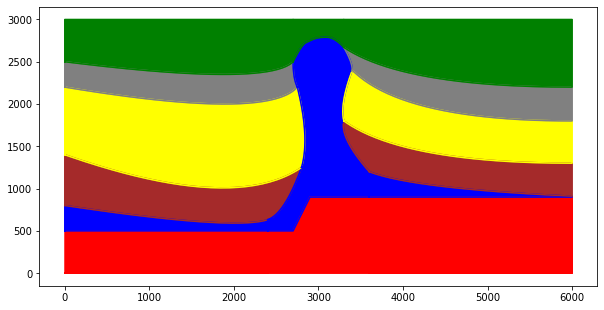

In [8]:
mult.plot_surfaces()

<AxesSubplot:>

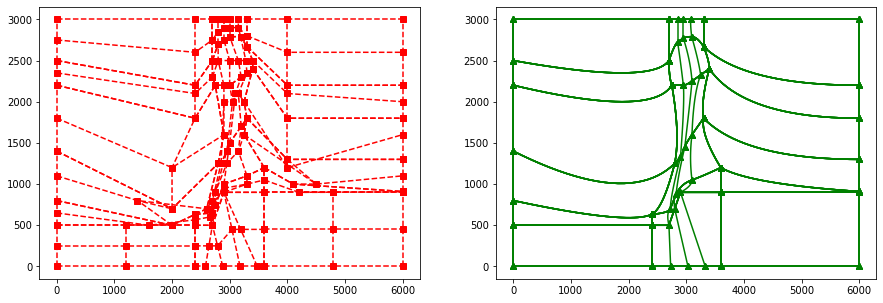

In [9]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15,5))
mult.plot_cpoints(ax=ax1)
mult.plot_knots(ax=ax2)

In [10]:
# Assign connection between faces
mult.define_topology()

True

In [11]:
# Global refine
knot_ins = np.arange(0.1, 1, 0.1)

mult.global_knot_insertion(knot_ins, direction =0)
mult.global_knot_insertion(knot_ins, direction =1)

True

<AxesSubplot:>

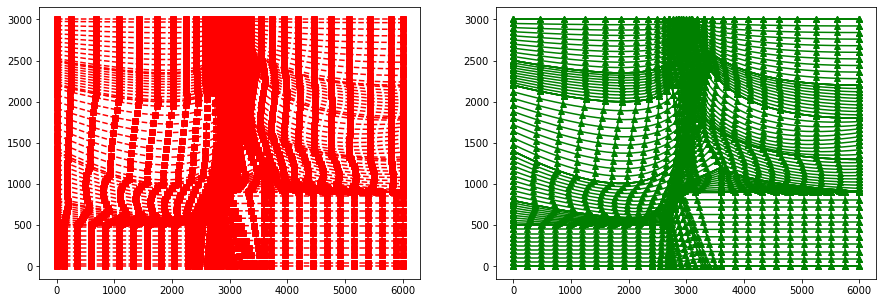

In [12]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15,5))
mult.plot_cpoints(ax=ax1)
mult.plot_knots(ax=ax2)

In [13]:
gDoF = mult.fill_topological_info()
print("Global degrees of freedom: ", gDoF)

Global degrees of freedom:  2479


<a id='k'></a>
## 2) Assemble stiffness matrix

In [14]:
# Set empty the stiffness matrix
K = np.zeros((gDoF, gDoF))

In [15]:
# Assemble stiffnes matrix
from pygeoiga.analysis.MultiPatch import form_k_IGA_mp

In [16]:
# Depending to the degrees of freedoms this can take a while
K = form_k_IGA_mp(mult.geometry, K)

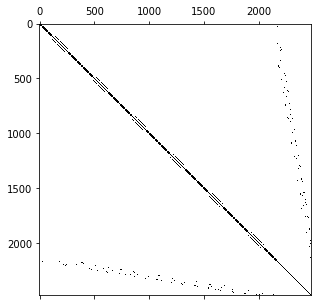

In [17]:
# Plot the stiffness matrix shape
fig, ax = plt.subplots(figsize=(5,5))
ax.spy(K)

<a id='bc'></a>
## 3) Assign Boundary conditions

In [18]:
f = np.zeros(gDoF) # Force vector
a = np.zeros(gDoF) # Solution vector

In [19]:
T_t = 10  # [°C]
T_b = 90  # [°C]
T_l = None  # 10
T_r = None  # 40

In [20]:
from pygeoiga.analysis.MultiPatch import boundary_condition_mp
bc, a = boundary_condition_mp(mult.geometry, a, T_t, T_b, T_l, T_r)
bc["gDOF"] = gDoF

<a id='solve'></a>
## 4) Solve:  Ka = f


In [21]:
from pygeoiga.analysis.common import solve

In [22]:
a, f = solve(bc, K, f, a)

In [23]:
# Temperatures
a[:10]

array([90., 90., 90., 90., 90., 90., 90., 90., 90., 90.])

<a id='post'></a>
## 5) Post-processing

In [24]:
from pygeoiga.analysis.MultiPatch import map_MP_elements
# Map solution to geometry
mult.geometry = map_MP_elements(mult.geometry, a)

<a id='plot'></a>
### Plotting

<AxesSubplot:>

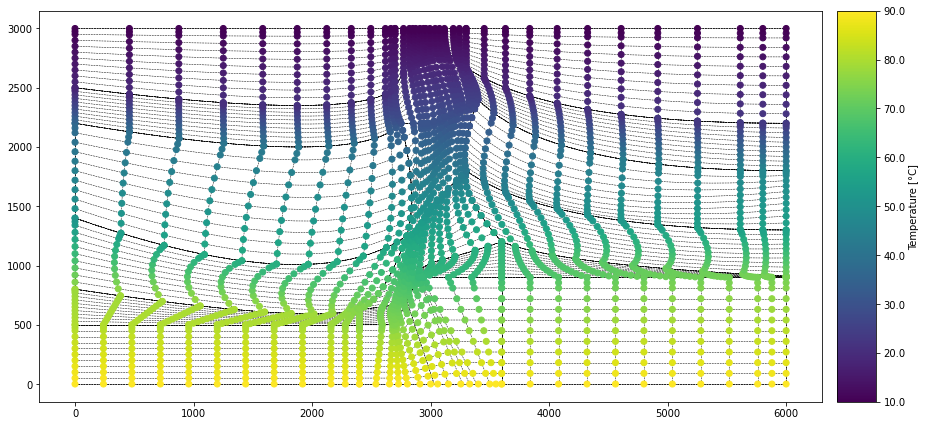

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_aspect("equal")
mult.plot_knots(ax = ax, linewidth=0.5, linestyle="--", color="black", point=False)
mult.plot_solution(ax = ax, colorbar=True, point=True, fill=False, contour=False)

/home/danielsk78/GitProjects/IGA_master_thesis/pygeoiga/pygeoiga/plot/solution_mpl.py:89: UserWarning: No contour levels were found within the data range.
  con = ax.contour(x_pos, y_pos, temperature, levels=levels, zorder=50, colors=colors, **kwargs)


<AxesSubplot:>

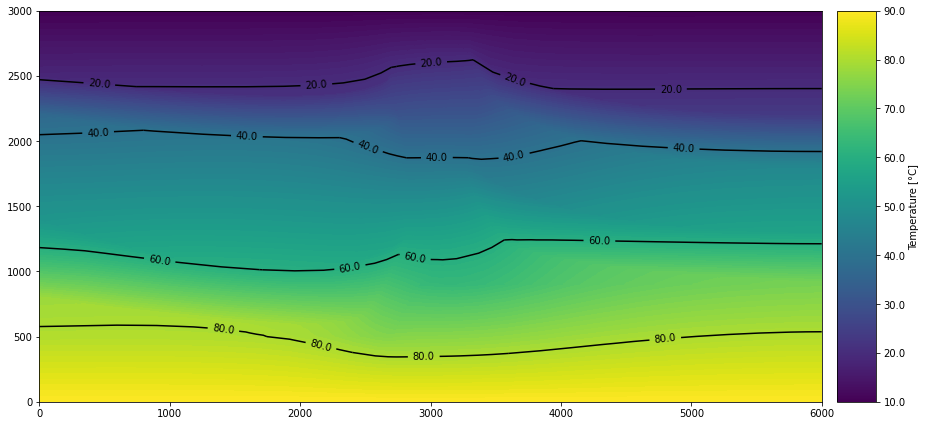

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_aspect("equal")
mult.plot_solution(ax = ax, colorbar=True, point=False, fill=True, contour=False, levels=100)
mult.plot_solution(ax = ax, colorbar=True, point=False, fill=False, contour=True, levels=[20, 40, 60, 80])